In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("reports.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')
df['Day'] = df['Date'].dt.day
df['DayName'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayName'] = pd.Categorical(df['DayName'], categories=days_order, ordered=False)

In [7]:
#How many unique orders were placed at each store?
unique_orders_each_store = df.groupby("StoreName").OrderNo.count()
# unique_orders_each_store

In [60]:
#What is the average number of orders per day?
total_order = df.groupby("Date").OrderNo.count()
order_avg_per_day = total_order.sum()/total_order.count()
order_avg_per_day

np.float64(1.3893805309734513)

In [49]:
#Which location has the highest number of orders?
highest_order_by_location = df.groupby("Location").OrderNo.count()
(f"Max Order By Location {highest_order_by_location.idxmax()} and TotalOrder: {highest_order_by_location.max()}")

'Max Order By Location VijayNagar,Indore and TotalOrder: 34'

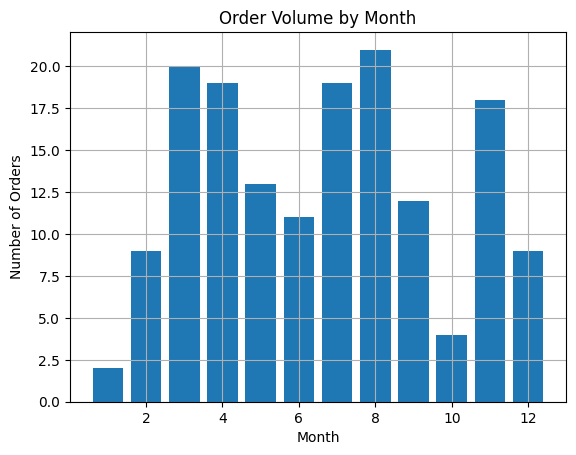

In [61]:
#How does the order volume vary by month?
monthly_order_volume = df.groupby('Month').size()
plt.bar(monthly_order_volume.index.to_list(), monthly_order_volume.to_list())
plt.title('Order Volume by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)